In [11]:
import pandas as pd
import numpy as np

In [12]:
train = pd.read_csv('C://Users//amank//OneDrive//Documents//NewYork_Taxi//train.csv',infer_datetime_format=True, parse_dates=[2,3])

In [13]:
original_data = train.copy()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [15]:
train.passenger_count = train.passenger_count.astype(np.uint8)
train.vendor_id = train.vendor_id.astype(np.uint8)
train.trip_duration = train.trip_duration.astype(np.uint32)
train.store_and_fwd_flag = train.store_and_fwd_flag.astype('category')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null uint8
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null uint8
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null category
trip_duration         1458644 non-null uint32
dtypes: category(1), datetime64[ns](2), float64(4), object(1), uint32(1), uint8(2)
memory usage: 87.6+ MB


In [9]:
train  = original_data.iloc[:100000]
train.pickup_datetime = pd.to_datetime(train.pickup_datetime,  format="%Y-%m-%d %H:%M:%S")
train.dropoff_datetime = pd.to_datetime(train.pickup_datetime,  format="%Y-%m-%d %H:%M:%S")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
id                    100000 non-null object
vendor_id             100000 non-null int64
pickup_datetime       100000 non-null datetime64[ns]
dropoff_datetime      100000 non-null datetime64[ns]
passenger_count       100000 non-null int64
pickup_longitude      100000 non-null float64
pickup_latitude       100000 non-null float64
dropoff_longitude     100000 non-null float64
dropoff_latitude      100000 non-null float64
store_and_fwd_flag    100000 non-null object
trip_duration         100000 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 8.4+ MB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
print(train.trip_duration.min())
print(train.trip_duration.max())
print('max time', train.trip_duration.max()/(60*60))

1
3526282
max time 979.5227777777778


In [18]:
train.shape

(1458644, 11)

In [20]:
print(train.isnull().sum()) # nice, no N/A values

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [112]:
train['day_week'] = train.pickup_datetime.dt.dayofweek
train['week'] = train.pickup_datetime.dt.week
train['month'] = train.pickup_datetime.dt.month
train['time'] = train.pickup_datetime.dt.time
train.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_week,week,month,time
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,11,3,17:24:55
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,23,6,00:43:35
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,3,1,11:35:24
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,14,4,19:32:31
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,12,3,13:30:55


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
id                    10000 non-null object
vendor_id             10000 non-null int64
pickup_datetime       10000 non-null datetime64[ns]
dropoff_datetime      10000 non-null datetime64[ns]
passenger_count       10000 non-null int64
pickup_longitude      10000 non-null float64
pickup_latitude       10000 non-null float64
dropoff_longitude     10000 non-null float64
dropoff_latitude      10000 non-null float64
store_and_fwd_flag    10000 non-null object
trip_duration         10000 non-null int64
day_week              10000 non-null int64
week                  10000 non-null int64
month                 10000 non-null int64
time                  10000 non-null object
dtypes: datetime64[ns](2), float64(4), int64(6), object(3)
memory usage: 1.1+ MB


In [10]:
train.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_week,week,month,time
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,11,3,17:24:55
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,23,6,00:43:35
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,3,1,11:35:24
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,14,4,19:32:31
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,12,3,13:30:55
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,443,5,4,1,22:01:40
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:34:59,4,-73.969017,40.757839,-73.957405,40.765896,N,341,4,24,6,22:34:59
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 07:54:58,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,5,20,5,07:54:58
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:12:23,1,-73.999481,40.738400,-73.985786,40.732815,N,255,4,21,5,23:12:23
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 21:45:01,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,3,10,3,21:45:01


In [113]:
train['was_weekend'] = ((train.day_week == 6) | (train.day_week == 7)).astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
train.info()
train.time.dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
id                    100000 non-null object
vendor_id             100000 non-null int64
pickup_datetime       100000 non-null datetime64[ns]
dropoff_datetime      100000 non-null datetime64[ns]
passenger_count       100000 non-null int64
pickup_longitude      100000 non-null float64
pickup_latitude       100000 non-null float64
dropoff_longitude     100000 non-null float64
dropoff_latitude      100000 non-null float64
store_and_fwd_flag    100000 non-null object
trip_duration         100000 non-null int64
day_week              100000 non-null int64
week                  100000 non-null int64
month                 100000 non-null int64
time                  100000 non-null object
was_weekend           100000 non-null int32
dtypes: datetime64[ns](2), float64(4), int32(1), int64(6), object(3)
memory usage: 11.8+ MB


dtype('O')

In [115]:
train.drop('time', axis = 1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_week,week,month,was_weekend
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,11,3,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,23,6,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,3,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,14,4,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,12,3,0
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,443,5,4,1,0
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:34:59,4,-73.969017,40.757839,-73.957405,40.765896,N,341,4,24,6,0
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 07:54:58,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,5,20,5,0
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:12:23,1,-73.999481,40.738400,-73.985786,40.732815,N,255,4,21,5,0
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 21:45:01,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,3,10,3,0


In [116]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_week,week,month,time,was_weekend
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,11,3,17:24:55,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,23,6,00:43:35,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,3,1,11:35:24,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,14,4,19:32:31,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,12,3,13:30:55,0


In [117]:
train.time = train.pickup_datetime.apply(lambda x : pd.to_timedelta(str(x).split()[1]))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
id                    10000 non-null object
vendor_id             10000 non-null int64
pickup_datetime       10000 non-null datetime64[ns]
dropoff_datetime      10000 non-null datetime64[ns]
passenger_count       10000 non-null int64
pickup_longitude      10000 non-null float64
pickup_latitude       10000 non-null float64
dropoff_longitude     10000 non-null float64
dropoff_latitude      10000 non-null float64
store_and_fwd_flag    10000 non-null object
trip_duration         10000 non-null int64
day_week              10000 non-null int64
week                  10000 non-null int64
month                 10000 non-null int64
time                  10000 non-null timedelta64[ns]
was_weekend           10000 non-null int32
dtypes: datetime64[ns](2), float64(4), int32(1), int64(6), object(2), timedelta64[ns](1)
memory usage: 1.2+ MB


In [118]:
morning_times = pd.to_timedelta(['07:00:00', '10:00:00'])
evening_times = pd.to_timedelta(['16:00:00', '19:00:00'])

print(morning_times, evening_times)

TimedeltaIndex(['07:00:00', '10:00:00'], dtype='timedelta64[ns]', freq=None) TimedeltaIndex(['16:00:00', '19:00:00'], dtype='timedelta64[ns]', freq=None)


In [119]:
print(train.time[1])
print(morning_times[1])
train.time[1]<morning_times[1]
train.head()
#print(train.time[1] in morning_times | train.time[1] in evening_times)

0 days 00:43:35
0 days 10:00:00


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_week,week,month,time,was_weekend
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,11,3,17:24:55,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,23,6,00:43:35,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,3,1,11:35:24,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,14,4,19:32:31,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,12,3,13:30:55,0


In [120]:
def rushHourTravel(data):
    if (((data >= morning_times[0]) & (data <= morning_times[1])) | ((data>= evening_times[0]) & (data<=evening_times[1]))):
        return True
    else:
        return False

In [121]:
train['rush_hour_travelled'] = train.apply((lambda x : rushHourTravel(x['time'])),axis=1)
train.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_week,week,month,time,was_weekend,rush_hour_travelled
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,11,3,17:24:55,0,True
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,23,6,00:43:35,1,False
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,3,1,11:35:24,0,False
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,14,4,19:32:31,0,False
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,12,3,13:30:55,0,False


In [122]:
train[['time','rush_hour_travelled']].head(50)
train['SUV'] = train.passenger_count > 4

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [124]:
import matplotlib.pyplot as plt

train_filter = train.drop(list(np.array(train[train.trip_duration >10800].index)))
train_filter = pd.get_dummies(train_filter, columns=['vendor_id'], drop_first= True)


In [126]:
print(train_filter[train_filter.trip_duration >10800])
print(train_filter.vendor_id_2.unique())

Empty DataFrame
Columns: [id, pickup_datetime, dropoff_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, trip_duration, day_week, week, month, time, was_weekend, rush_hour_travelled, SUV, vendor_id_2]
Index: []
[1 0]


In [127]:
#train_filter.to_csv('C://Users//amank//Desktop//leaned_file_new_york.csv')

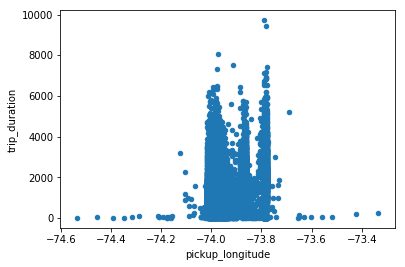

In [128]:
train_filter.plot(kind = "scatter", x="pickup_longitude", y="trip_duration")

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [130]:
print(train_filter.index)
train_filter.set_index('id',inplace=True)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            99990, 99991, 99992, 99993, 99994, 99995, 99996, 99997, 99998,
            99999],
           dtype='int64', length=99871)


In [131]:
#target = trip_duration
train_target = train_filter.trip_duration
train_predictors = train_filter.drop('trip_duration', axis = 1)
print( train_predictors.columns)

Index(['pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'day_week', 'week', 'month',
       'time', 'was_weekend', 'rush_hour_travelled', 'SUV', 'vendor_id_2'],
      dtype='object')


In [132]:
print(train_predictors.dtypes)
train_predictors = train_predictors.drop(['time','pickup_datetime','dropoff_datetime','store_and_fwd_flag'], axis = 1)
train_predictors.head()

pickup_datetime         datetime64[ns]
dropoff_datetime        datetime64[ns]
passenger_count                  int64
pickup_longitude               float64
pickup_latitude                float64
dropoff_longitude              float64
dropoff_latitude               float64
store_and_fwd_flag              object
day_week                         int64
week                             int64
month                            int64
time                   timedelta64[ns]
was_weekend                      int32
rush_hour_travelled               bool
SUV                               bool
vendor_id_2                      uint8
dtype: object


,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_week,week,month,was_weekend,rush_hour_travelled,SUV,vendor_id_2
id,,,,,,,,,,,,
id2875421,1,-73.982155,40.767937,-73.964630,40.765602,0,11,3,0,True,False,1
id2377394,1,-73.980415,40.738564,-73.999481,40.731152,6,23,6,1,False,False,0
id3858529,1,-73.979027,40.763939,-74.005333,40.710087,1,3,1,0,False,False,1
id3504673,1,-74.010040,40.719971,-74.012268,40.706718,2,14,4,0,False,False,1
id2181028,1,-73.973053,40.793209,-73.972923,40.782520,5,12,3,0,False,False,1


In [30]:
X_train, X_test, y_train, y_test = train_test_split(train_predictors, train_target, test_size = 0.3, random_state=42)
linear_reg = LinearRegression()

In [31]:
linear_reg.fit(X_train, y_train)
y_predicted = linear_reg.predict(X_test)

In [133]:
from sklearn.metrics import mean_squared_error

In [33]:
mean_squared_error(y_test,y_predicted)

341147.63394132047

In [34]:
from sklearn.linear_model import Lasso

In [35]:
lasso = Lasso(alpha = 0.4 , normalize = True)

In [36]:
lasso.fit(X_train, y_train)
y_lasso_predicted = lasso.predict(X_test)

In [37]:
mean_squared_error(y_lasso_predicted, y_test)

349344.73442677205

In [38]:
lasso.score(X_test, y_test)

0.16632121486268026

In [39]:
linear_reg.score(X_train, y_train)

0.18704460549844848

In [134]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
regr = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=100)

In [42]:
regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [43]:
regr.feature_importances_

array([0.00000000e+00, 4.32564608e-01, 6.17932709e-02, 3.67553913e-01,
       1.29969591e-01, 3.90564304e-04, 2.77801450e-03, 2.93399156e-03,
       8.29680046e-06, 1.96615579e-03, 0.00000000e+00, 4.15945525e-05])

In [44]:
y_pred = regr.predict(X_test)

In [45]:
regr.score(X_test,y_test)

0.4365207660115921

In [46]:
regr.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [47]:
train_pred_reg = train_filter.drop('trip_duration', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(train_predictors, train_target, test_size = 0.3, random_state=42)

In [48]:
from sklearn.neural_network import MLPRegressor
nn_reg = MLPRegressor(hidden_layer_sizes=(5,2), random_state=1)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype bool, uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype bool, uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype bool, uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [51]:
nn_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [52]:
nn_y_pred = nn_reg.predict(X_test)

In [53]:
mean_squared_error(y_test, nn_y_pred)

327297.7520751013

In [54]:
nn_reg.score(X_test, y_test)

0.2189342920085089

In [55]:
regr = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=100)
regr.fit(X_train,y_train)
regr.feature_importances_

array([2.63060679e-03, 3.72465171e-01, 1.04692663e-01, 3.31173396e-01,
       1.61594191e-01, 4.89652283e-03, 8.90641386e-03, 5.30219486e-03,
       6.09462969e-04, 6.67561998e-03, 1.78972804e-04, 8.74784305e-04])

In [56]:
train_pred_reg.columns

Index(['pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'day_week', 'week', 'month',
       'time', 'was_weekend', 'rush_hour_travelled', 'SUV', 'vendor_id_2'],
      dtype='object')

In [57]:
sorted(list(zip(train_pred_reg.columns, regr.feature_importances_)), key= lambda x: x[1], reverse=True)

[('dropoff_datetime', 0.37246517084278447),
 ('pickup_longitude', 0.3311733963058829),
 ('pickup_latitude', 0.1615941910807483),
 ('passenger_count', 0.10469266336633616),
 ('dropoff_latitude', 0.008906413863563644),
 ('week', 0.006675619979647735),
 ('store_and_fwd_flag', 0.005302194860273026),
 ('dropoff_longitude', 0.004896522833343752),
 ('pickup_datetime', 0.0026306067897596203),
 ('time', 0.0008747843046803788),
 ('day_week', 0.0006094629694426771),
 ('month', 0.00017897280353746815)]

In [58]:
regr.score(X_test, y_test)

0.4860459652774021

In [59]:
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)
regr.fit(X_train,y_train)
regr.feature_importances_

array([0.00708838, 0.3215928 , 0.14066321, 0.29971954, 0.17672612,
       0.01343652, 0.01929323, 0.00816264, 0.00132883, 0.00830354,
       0.0009164 , 0.0027688 ])

In [60]:
regr.score(X_test, y_test)

0.5498681963308354

In [61]:
random_10_predict = regr.predict(X_test)
mean_squared_error(y_test,random_10_predict)

188623.21821461068

In [62]:
sorted(list(zip(train_pred_reg.columns, regr.feature_importances_)), key= lambda x: x[1], reverse=True)

[('dropoff_datetime', 0.32159279750796416),
 ('pickup_longitude', 0.29971953714227656),
 ('pickup_latitude', 0.17672611732905583),
 ('passenger_count', 0.14066320896837164),
 ('dropoff_latitude', 0.019293226600067687),
 ('dropoff_longitude', 0.013436520422741335),
 ('week', 0.008303538119909084),
 ('store_and_fwd_flag', 0.008162643878245782),
 ('pickup_datetime', 0.007088376272533722),
 ('time', 0.0027687962364152186),
 ('day_week', 0.001328834607362933),
 ('month', 0.0009164029150561046)]

In [63]:
from sklearn.neighbors import NearestNeighbors

In [64]:
neighbors = NearestNeighbors(n_neighbors= 5, algorithm='ball_tree').fit(train_pred_reg[['pickup_longitude', 'pickup_latitude']])
distances, indices = neighbors.kneighbors(train_pred_reg[['pickup_longitude', 'pickup_latitude']])

In [65]:
distances, indices

(array([[0.00000000e+00, 8.70720841e-05, 1.61663972e-04, 1.86296317e-04,
         1.90734863e-04],
        [0.00000000e+00, 3.51697710e-05, 1.51870951e-04, 2.13759243e-04,
         2.58162297e-04],
        [0.00000000e+00, 1.63097827e-04, 2.06452318e-04, 2.14981122e-04,
         2.59651735e-04],
        ...,
        [0.00000000e+00, 1.63276173e-04, 1.84530436e-04, 2.75953207e-04,
         2.87193760e-04],
        [0.00000000e+00, 2.42615946e-04, 2.67899320e-04, 3.24249268e-04,
         3.28861421e-04],
        [0.00000000e+00, 8.69884815e-05, 1.23256641e-04, 2.11018626e-04,
         2.45685458e-04]]), array([[   0, 5946, 7920, 4543,  952],
        [   1, 6014, 8743, 8425, 4614],
        [   2,  868, 9771, 5593, 1022],
        ...,
        [9986, 9670, 7881, 1891, 1076],
        [9987, 8512, 7007, 2905, 4634],
        [9988, 9633,  891, 9952, 6466]], dtype=int64))

In [66]:
type(indices)

numpy.ndarray

In [67]:
indices[:10]

array([[   0, 5946, 7920, 4543,  952],
       [   1, 6014, 8743, 8425, 4614],
       [   2,  868, 9771, 5593, 1022],
       [   3, 4293, 3428,  395, 4970],
       [   4, 1015, 9486,  536, 9631],
       [   5, 4874, 6271,  361, 6788],
       [   6,  452, 4968, 2315, 6089],
       [   7, 1968,  689, 1786, 2521],
       [   8, 1436, 7616, 2350, 6583],
       [   9,  742, 9555, 4579, 3955]], dtype=int64)

In [68]:
indices.shape

(9989, 5)

In [69]:
from sklearn import cluster

In [70]:
train_predi

NameError: name 'train_predi' is not defined

In [141]:
kmeans= cluster.KMeans(n_clusters=100)
kmeans.fit(train_predictors[['pickup_longitude', 'pickup_latitude']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [142]:
kmeans1 = cluster.KMeans(n_clusters = 100)
kmeans1.fit(train_predictors[['dropoff_longitude','dropoff_latitude']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [145]:
kmeans.labels_

array([61, 32,  0, ..., 44, 32, 76])

In [146]:
train_predictors['dropoff_cluster'] = kmeans1.labels_

In [148]:
train_predictors['pickup_cluster'] = kmeans.labels_

In [149]:
train_pred_reg.head()

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day_week,week,month,time,was_weekend,rush_hour_travelled,SUV,vendor_id_2,dropoff_cluster,pickup_cluster
id,,,,,,,,,,,,,,,,,,
id2875421,2016-03-14 17:24:55,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,0,11,3,17:24:55,0,True,False,1,17,29
id2377394,2016-06-12 00:43:35,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6,23,6,00:43:35,1,False,False,0,62,90
id3858529,2016-01-19 11:35:24,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,1,3,1,11:35:24,0,False,False,1,97,0
id3504673,2016-04-06 19:32:31,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,2,14,4,19:32:31,0,False,False,1,51,53
id2181028,2016-03-26 13:30:55,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,5,12,3,13:30:55,0,False,False,1,44,61


In [151]:
X_train, X_test, y_train, y_test = train_test_split(train_predictors, train_target, test_size = 0.3, random_state=42)
# X_train  = X_train.drop(['pickup_datetime','dropoff_datetime','store_and_fwd_flag','time'], axis =1 )
# X_test  = X_test.drop(['pickup_datetime','dropoff_datetime','store_and_fwd_flag','time'], axis =1 )
print(X_train.info())
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)
regr.fit(X_train,y_train)
regr.feature_importances_
sorted(list(zip(X_train.columns, regr.feature_importances_)), key= lambda x: x[1], reverse=True)

<class 'pandas.core.frame.DataFrame'>
Index: 69909 entries, id3255393 to id2860692
Data columns (total 14 columns):
passenger_count        69909 non-null int64
pickup_longitude       69909 non-null float64
pickup_latitude        69909 non-null float64
dropoff_longitude      69909 non-null float64
dropoff_latitude       69909 non-null float64
day_week               69909 non-null int64
week                   69909 non-null int64
month                  69909 non-null int64
was_weekend            69909 non-null int32
rush_hour_travelled    69909 non-null bool
SUV                    69909 non-null bool
vendor_id_2            69909 non-null uint8
dropoff_cluster        69909 non-null int32
pickup_cluster         69909 non-null int32
dtypes: bool(2), float64(4), int32(3), int64(4), uint8(1)
memory usage: 5.8+ MB
None


[('pickup_longitude', 0.35786644899687664),
 ('dropoff_longitude', 0.27205077212360673),
 ('dropoff_latitude', 0.1732968894946313),
 ('pickup_latitude', 0.13249086064478313),
 ('day_week', 0.018333314380250515),
 ('rush_hour_travelled', 0.013913400148444626),
 ('week', 0.009265873268658083),
 ('dropoff_cluster', 0.0069070951606884775),
 ('month', 0.006388305597240097),
 ('pickup_cluster', 0.004439710521813673),
 ('passenger_count', 0.0028618204705380804),
 ('vendor_id_2', 0.001181623922247733),
 ('was_weekend', 0.0006460778175804),
 ('SUV', 0.00035780745264053673)]

In [152]:
from sklearn.metrics import mean_squared_error
y_pred =regr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

439.03941435565997


In [153]:
print(regr.score(X_test, y_test))

0.544642275032356
